In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split

alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
# Read in CSV data
red = pd.read_csv("data/winequality-red.csv", sep=";")
white = pd.read_csv("data/winequality-white.csv", sep=";")

In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# add wine category columns and join tables

red['wine_type'] = 'red'
white['wine_type'] = 'white'

In [6]:
wines = pd.concat([red, white])
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


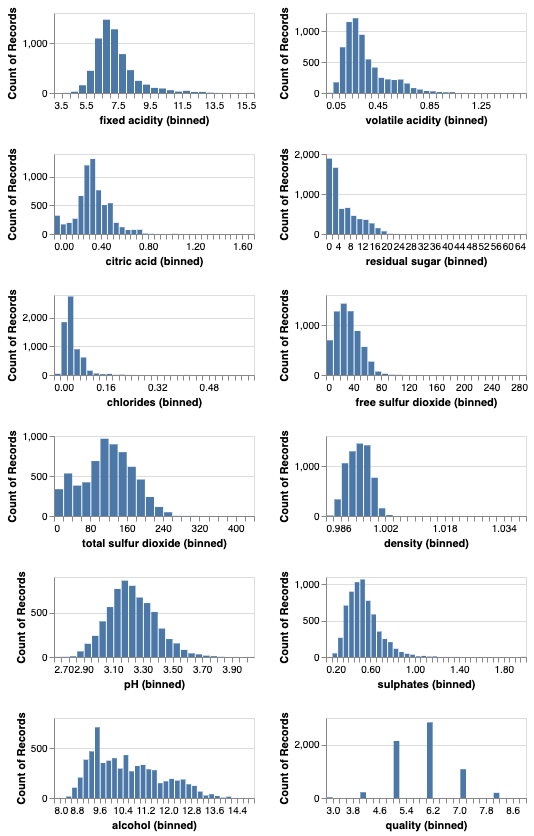

In [9]:
numeric_cols = wines.select_dtypes('number').columns.tolist()
histograms = (alt.Chart(wines).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()')
 .properties(height=80, width=200)
 .repeat(repeat=numeric_cols, columns=2))

histograms

In [10]:
X_df = wines.drop(columns=['quality'])
y_df = wines['quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=2020)

In [12]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
816,8.4,0.18,0.42,5.10,0.036,7.0,77.0,0.99390,3.16,0.52,11.7,white
3262,7.6,0.19,0.32,18.75,0.047,32.0,193.0,1.00014,3.10,0.50,9.3,white
814,7.9,0.35,0.24,15.60,0.072,44.0,229.0,0.99785,3.03,0.59,10.5,white
1767,7.4,0.32,0.22,1.70,0.051,50.0,179.0,0.99550,3.28,0.69,8.9,white
1345,7.3,0.39,0.37,1.10,0.043,36.0,113.0,0.99100,3.39,0.48,12.7,white


In [13]:
# transformers: standard scalar, OHE on wine_type
numeric_cols.remove('quality')
numeric_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [14]:
categorical_cols = ['wine_type']

In [ ]:
# get baseline score with DummyClassifier
dummy = DummyClassifier()


In [ ]:
# make column transformer

In [15]:
# make pipeline with appropriate models to run - maybe LR, kNN, ?